In [ ]:
import tensorflow as tf
import numpy as np
import os
from tqdm import tqdm
import cv2
import random
import matplotlib.pyplot as plt
from cv2 import CascadeClassifier
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_train = "/content/drive/MyDrive/Colab Notebooks/dataset/new_mask_dataset/Train"
path_test = "/content/drive/MyDrive/Colab Notebooks/dataset/new_mask_dataset/Test"
# path_validation = "/content/drive/MyDrive/Colab Notebooks/dataset/new_mask_dataset/Validation"

In [ ]:
CLASS = ("WithoutMask", "WithMask")
IMAGE_SIZE = 224

In [ ]:
def creat_data(DIR):
    
    # datani papgadan yig'ib olish
    ummumiy_data = []
    for categoria in CLASS:        
        path = os.path.join(DIR,categoria)
        class_num = CLASS.index(categoria)
        for image_name in tqdm(os.listdir(path)):
            try:                
                img_array = cv2.imread(os.path.join(path, image_name))                
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                ummumiy_data.append((img_array, class_num))
            except Exception as e:
                pass
    
    # datani aralashtirish
    random.seed(13)
    random.shuffle(ummumiy_data)
    
    # rasmlarni va ularning labellarni ajratish va  train , test  datalariga ajratishga tayyorlash
    #                          0 - maskasiz    1 - maskali
    all_images = []
    all_labels = []
    
    for img, label in ummumiy_data:
        all_images.append(img)
        all_labels.append(label) 
    all_images = np.array(all_images, dtype= np.float32).reshape(-1, IMAGE_SIZE, IMAGE_SIZE,3)
    all_labels = np.array(all_labels, dtype=np.uint8)
    
    # DDR ni tejash maqsadida ummumiy data o'chiramiz
    del ummumiy_data
   
    
    return preprocess_input(all_images) , all_labels

In [ ]:
x_test, y_test = creat_data(path_test)

100%|██████████| 483/483 [00:04<00:00, 102.86it/s]


In [ ]:
x_test.shape, y_test.shape

((992, 224, 224, 3), (992,))

In [ ]:
def creat_data(DIR):
    
    # datani papgadan yig'ib olish
    ummumiy_data = []
    for categoria in CLASS:        
        path = os.path.join(DIR,categoria)
        class_num = CLASS.index(categoria)
        for image_name in tqdm(os.listdir(path)[:2000]):
            try:                
                img_array = cv2.imread(os.path.join(path, image_name))                
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                ummumiy_data.append((img_array, class_num))
            except Exception as e:
                pass
    
    # datani aralashtirish
    random.seed(13)
    random.shuffle(ummumiy_data)
    
    # rasmlarni va ularning labellarni ajratish va  train , test  datalariga ajratishga tayyorlash
    #                          0 - maskasiz    1 - maskali
    all_images = []
    all_labels = []
    
    for img, label in ummumiy_data:
        all_images.append(img)
        all_labels.append(label) 
    all_images = np.array(all_images, dtype= np.float32).reshape(-1, IMAGE_SIZE, IMAGE_SIZE,3)
    all_labels = np.array(all_labels, dtype=np.uint8)
    
    # DDR ni tejash maqsadida ummumiy data o'chiramiz
    del ummumiy_data
   
    
    return preprocess_input(all_images), all_labels

In [ ]:
x_train, y_train = creat_data(path_train)

100%|██████████| 2000/2000 [01:02<00:00, 31.88it/s] 


In [ ]:
x_train.shape, y_train.shape

((4000, 224, 224, 3), (4000,))

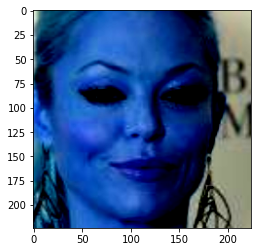

In [ ]:
plt.imshow(x_train[2])

In [ ]:
y_train[2]

0

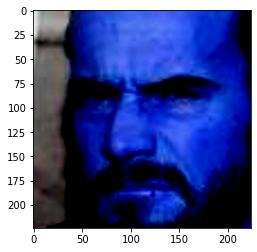

In [ ]:
plt.imshow(x_test[2])

In [ ]:
y_test[2]

0

In [ ]:
from tensorflow.keras.applications import MobileNetV2

model_MobileNet_notop = MobileNetV2(include_top=False, input_shape=(224,224,3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model_MobileNet_notop.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
len(model_MobileNet_notop.layers)

154

In [ ]:
model_MobileNet_notop.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
model = Sequential([
    model_MobileNet_notop,
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 100)               6272100   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,531,105
Trainable params: 6,273,121
Non-trainable params: 2,257,984
______________________________________

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=2, epochs=5, validation_split=0.2)

Epoch 1/5
1600/1600 [==============================] - 25s 10ms/step - loss: 0.1097 - accuracy: 0.9931 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 2/5
1600/1600 [==============================] - 15s 9ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 7.5150e-06 - val_accuracy: 1.0000
Epoch 3/5
1600/1600 [==============================] - 14s 9ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 4.4913e-10 - val_accuracy: 1.0000
Epoch 4/5
1600/1600 [==============================] - 14s 9ms/step - loss: 0.1344 - accuracy: 0.9978 - val_loss: 0.0426 - val_accuracy: 0.9987
Epoch 5/5
1600/1600 [==============================] - 14s 9ms/step - loss: 0.0358 - accuracy: 0.9987 - val_loss: 0.0288 - val_accuracy: 0.9987


In [ ]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 3s 45ms/step - loss: 20.4960 - accuracy: 0.9274


[20.4959716796875, 0.9274193644523621]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/mask_or_nomask/mask_classificatioon.h5')

In [ ]:
from tensorflow.keras.models  import load_model

In [ ]:
my_model = load_model("/content/drive/MyDrive/Colab Notebooks/models/mask_or_nomask/mask_classificatioon.h5")

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 100)               6272100   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,531,105
Trainable params: 6,273,121
Non-trainable params: 2,257,984
______________________________________

In [ ]:
my_model.predict(np.expand_dims(x_test[101], 0))

1/1 [==============================] - 1s 974ms/step


array([[0.]], dtype=float32)